In [1]:
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt

import zcu_tools.analysis as zf

%autoreload 2
from zcu_tools.datasaver import load_data

In [2]:
host = "005-writeboard"
port = 4999

# GE contrast

In [ ]:
g_path = "../Database/S001/2025/03/Data_0316/S001_GE_G_021@1.106mA.hdf5"
e_path = "../Database/S001/2025/03/Data_0316/S001_GE_E_021@1.106mA.hdf5"
g_signals, fpts, pdrs = load_data(g_path, host, port)
e_signals, fpts, pdrs = load_data(e_path, host, port)

fpts /= 1e9  # GHz

snr = np.abs(g_signals - e_signals)
plt.imshow(
    snr.T,
    aspect="auto",
    extent=[fpts[-1], fpts[0], pdrs[-1], pdrs[0]],
)

max_fpt = fpts[np.argmax(np.max(snr, axis=1))].item()
max_pdr = pdrs[np.argmax(np.max(snr, axis=0))].item()
max_fpt, max_pdr

# T1

In [ ]:
T1_path = "../Database/S001/2025/03/Data_0331/Test096_TwoTone_T1_035@-0.37mA.hdf5"
# D:\Labber_Data\Axel\S001\2025\03\Data_0331\Test096_TwoTone_T1_035@-0.37mA.hdf5

signals, Ts, _ = load_data(T1_path, host, port)

Ts *= 1e6  # us

t1 = zf.T1_analyze(Ts, signals, max_contrast=True, dual_exp=False)

# SingleShot

## Gound & Excited

In [3]:
load_path = "../../Database/Test096/2025/04/Data_0406/single_shot_ge_q_0.200mA_2.hdf5"

signals, _, _ = load_data(load_path, host, port)
signals = signals.T

signals.shape

(2, 1000000)

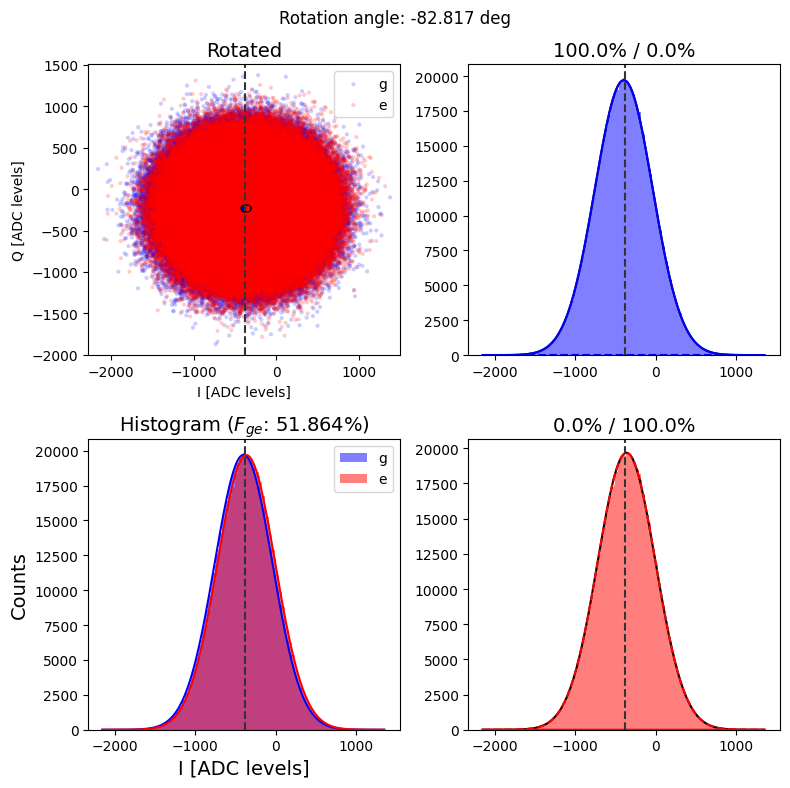

In [4]:
_ = zf.singleshot_ge_analysis(signals, plot=True, backend="center")

## SingleShot Rabi

In [5]:
load_path = "../../Database/Test096/2025/04/Data_0406/single_shot_rabi_q_0.200mA_3.hdf5"

signals, _, pdrs = load_data(load_path, host, port)
signals = signals.T

signals.shape, pdrs.shape

((101, 1000000), (101,))

Calculating histogram...Fitting dual Gaussian...Plotting...


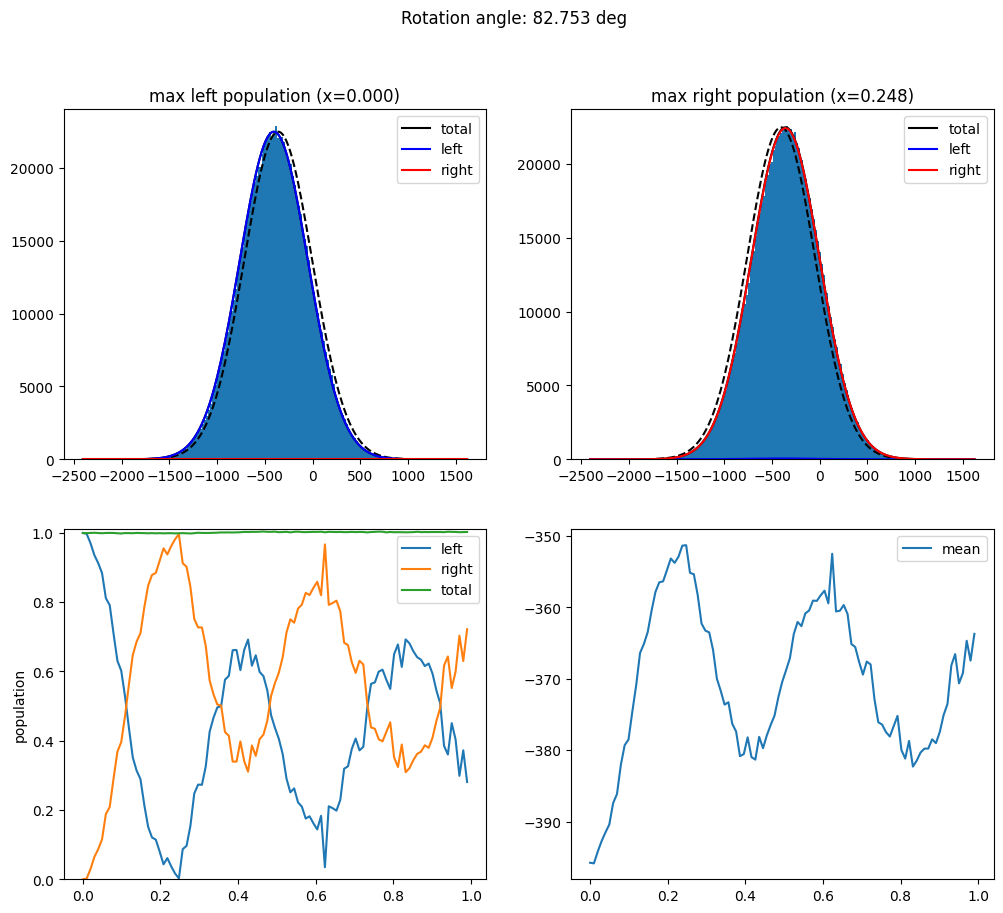

In [6]:
n_g, n_e, list_params = zf.single_shot.singleshot_rabi_analysis(
    pdrs, signals, pure_peak=True
)

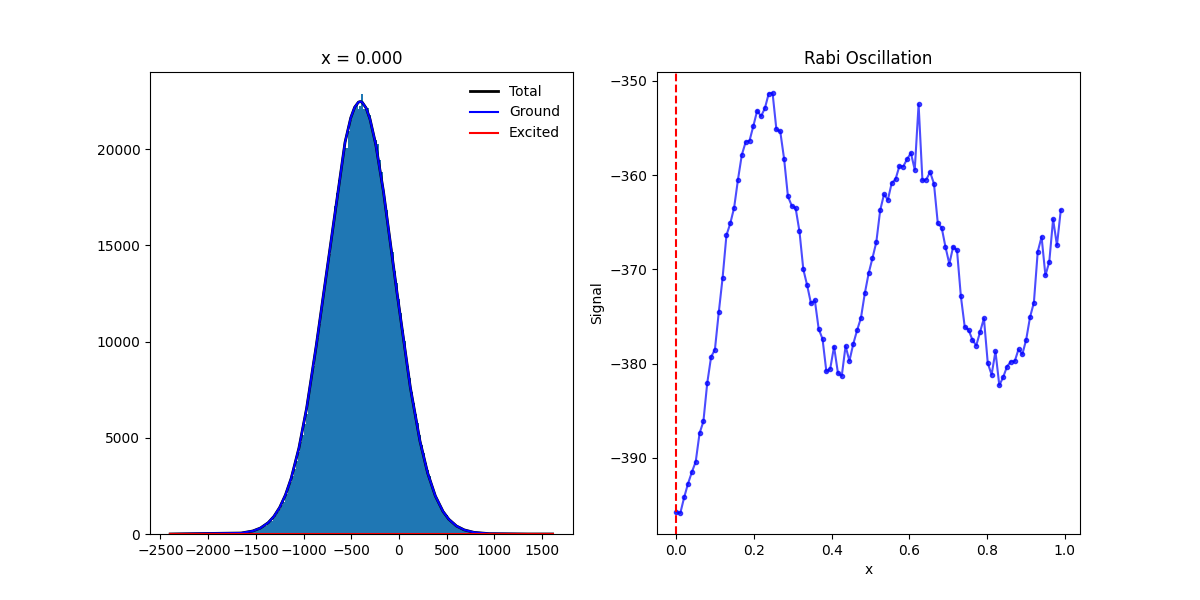

In [9]:
%matplotlib widget
stop_fn = zf.single_shot.visualize_singleshot_rabi(pdrs, signals, list_params)

In [10]:
stop_fn()